### Fill in group number and member names:

In [1]:
GROUP = "43"
NAME1 = "Hampus Öhman"
NAME2 = "Rasmus Bäcklund"

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the residual/step-length, $\norm{x^{k+1} - x^k}_{2}$, of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__ 

_Fill in your solution here!_ 

For $f$: 

\begin{align*}
	f(x) = \tfrac{1}{2}x^{\top} Q x + q^{\top}x
\end{align*}

The second order condition for convexity says that a function is convex if its Hessian is positive semi-definite. For $f$, we have the Hessian $\nabla^2f(x) = Q$ which is positive definite since $Q\in\mathbb{S}_{++}^{n}$.

For $\iota_{S}$: 

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

An indicator function is convex if and only if its set is convex, according to excercise 2.5. We want to show that the set $S$ is convex. Let $x,y\in S$ be two points in the set and $\theta \in [0, 1]$. The definition of convexity gives:

\begin{align}
   a = \theta a + (1 - \theta) a \leq \theta x + (1 - \theta)y \leq \theta b + (1 - \theta) b = b
\end{align}

Which concludes that $\theta x + (1 - \theta)y \in S$ for all points $x,y\in S$, and thus the set is convex.


For the CQ:

We need to show that $\relint \dom f \cap \relint \dom \iota_{S} \neq \emptyset$. The relative interior of the domain for $f$ is $\R^n$. Since the set $S$ is a subset of $\mathbb{R}^n$ and the relative interior of the domain of $\iota_{S}$ is the relative interior of $S$. We get that $\relint \dom \iota_{S} \subseteq \relint \dom f $. This together with the fact that $\relint S \neq \emptyset$ proves that $\relint \dom f \cap \relint \dom \iota_{S} \neq \emptyset$ holds and that CQ is satisfied.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

_Fill in your solution here!_

for $f^\ast$:

Fenchel-Youngs equality gives:
$f^\ast(s) = s^Tx-f(x)$ iff $s \in \partial f(x)$.

For $ f(x) = \tfrac{1}{2}x^T Q x + q^Tx$ we have $\partial f(x) = \{Qx+q\}$. 

This together with F-Y results in: 

\begin{align}
f^\ast(s) = s^Tx - f(x) = s^TQ^{-1}(s-q)-f(Q^{-1}(s-q)) = s^TQ^{-1}(s-q)-1/2(Q^{-1}(s-q))^TQ(Q^{-1}(s-q))-q^T(Q^{-1}(s-q)) = ... = \frac{1}{2}(s-q)^TQ^{-1}(s-q)
\end{align}

We know that the inverse $Q^{-1}$ exists since $Q$ is positive definite which implies that $Q$ is invertible.


For $\iota_{S}^\ast$: 
Using the definition of conjugate: 

\begin{align}
    \iota_{S}^*(s) &= \underset{x \in \mathbb{R}}{\text{sup}}\; (s^Tx - \iota_{S}(x)) \\
	&= \underset{x \in S}{\text{sup}}\; s^Tx = \sum_{i=1}^n \underset{x_i \in S}{\text{sup}}s_ix_i
\end{align}
where 
\begin{align}
    \underset{x_i \in S}{\text{sup}}s_ix_i \;=\begin{cases}
    as_i  &\text{if} \; s_i < 0 \\
    0  &\text{if} \; s_i = 0 \\
    bs_i &\text{if} \; s_i > 0
    \end{cases}
\end{align}

Since $\iota_S$ is an indicator function we can simplify the supremum by requiring that $x \in S$ as done above


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

_Fill in your solution here!_

We want to write down a Fenchel dual problem to the following problem:

\begin{align}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

A Fenchel dual problem is:

\begin{align}
	\min_{\mu\in \R^n} f^*(-\mu) + \iota_{S}^*(\mu)
\end{align}

We want to show that the constraint qualification for the dual problem holds. The constraint qualification for the dual is that:

\begin{align}
	\relint \dom (f^* \circ \mathit{-I}) \cap \relint \dom \iota^*_{S} \neq \emptyset
\end{align}

The domain of $\iota^*_S$ is $\mathbb{R}^n$. The domain of $f^*$ is $\mathbb{R}^n$, the domain for $f^* \circ -\mathit{I}$ will be the same, i.e. $\relint \dom (f^* \circ \mathit{-I}) = \relint \dom \iota^*_{S}$ . Thus both conjugate functions have the same domain, meaning that $\relint \dom (f^* \circ \mathit{-I}) \cap \relint \dom \iota^*_{S} \neq \emptyset$ holds and that CQ-D is satisfied.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

_Fill in your solution here!_

$f$ is $\beta$-smooth because its Hessian is pos. def. and therefor the second order condition for smoothnes is fulfilled. The smallest value for $\beta$ is the dominant eigenvalue of $Q$. $f^*$ is $\beta^*$-smooth because the inverse of $Q$ is also pos.def. and then the same argument holds. For the smallest possible value on $\beta^*$, we use the dominant eigenvalue of $Q^{-1}$.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__ 

_Fill in your solution here!_

$\nabla f (x) = Qx + q$ 

$\nabla f^* (\mu) = Q^{-1}(\mu-q)$

However, the input in the Prox-function will be $\left(\mu^k-\gamma_k\nabla (f^*\circ - \mathit{I})(\mu^k)\right)$. The last term can be rewritten as $\nabla (f^*\circ - \mathit{I})(\mu^k)=-\nabla f^*(-\mu^k)=Q^{-1}(\mu^k+q)$. This will be used in the python code. To get $\prox_{\gamma\iota_{S}}(z)$ we use definition. $\prox_{\gamma\iota_{S}}(z) = \argmin_{x}(\frac{1}{2} \norm{x-z}_2^2 + \iota_{S}(x)) =
\\ \argmin_{x}(\frac{1}{2} \norm{x-z}_2^2 : x \in S) = 
\\ \argmin_{x}(\norm{x-z}_2 : x \in S) =
\\ \Pi_S(z)$

That is the projection of the point z, onto the set $S$. Then the prox operator is:

\begin{align}
    \begin{cases}
        &v_i = \begin{cases}
            a_i &\text{for } v_i \leq a_i \\
            v_i &\text{for } v_i \in (a_i, b_i) \\
            b_i &\text{for } v_i \geq b_i
        \end{cases} \\
        &\prox_{\gamma\iota_{S}}(z) = \begin{bmatrix}
        v_1 \\
        \vdots\\
        v_n
        \end{bmatrix}
    \end{cases}
\end{align}


To get the prox operator for the conjugate function we use Moreau decompositions. We have that $\gamma\prox_{\gamma^{-1}\iota^*_{S}}(\gamma^{-1}z) = z- \prox_{\gamma\iota_{S}}(z)$, giving us:

\begin{align}
    \begin{cases}
        &v_i = \begin{cases}
            v_i-a\gamma &\text{if} \; v_i < a\gamma  \\
            0 &\text{if} \; z_i \in \gamma[a,b] \\
            v_i-b\gamma &\text{if} \; v_i > b\gamma \\
        \end{cases} \\
        &\prox_{\gamma\iota^\ast_{S}}(z) = \begin{bmatrix}
        v_1 \\
        \vdots\\
        v_n
        \end{bmatrix}
    \end{cases}
\end{align}




$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

_Fill in your solution here!_

We have that:

\begin{align}
	x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}

We let $v_i$ denote the input of the prox operator, i.e. $v^k = x^k - \gamma \nabla f(x^k) = x^k - \gamma(Qx^k +  q)$. Furthermore, let $v^k_i$ denote the i:th element in the k:th update. We then get:

$x^{k+1} = \begin{bmatrix}
x_1^{k+1} \\
\vdots \\
x_n^{k+1}
\end{bmatrix}
=
\begin{cases}
a_i &\text{if} \; v^k_i \leq a_i \\
v^k_i &\text{if} \; v^k_i \in (a_i,b_i) \\
b_i &\text{if} \; v^k_i \geq b_i \\
\end{cases}$

Where $i$ is the index of the element in the vector $x^k$. We can do this since $g$ is separable. i.e. we can write it as the sum: $\iota_S(x) = \sum_{i=1}^n\iota_{S_i}(x_i)$. Where we define
\begin{align}
    \iota_{S_i}(x_i) = \begin{cases}
        0 &\text{if } x_i \in [a_i, b_i] \\
        \infty &\text{if } x_i \notin [a_i, b_i]
    \end{cases}
\end{align}

For the dual problem we have: 
\begin{align}
	\mu^{k+1} = \prox_{\gamma g}\left(\mu^k-\gamma\nabla (f^*\circ - \mathit{I})(\mu^k)\right).
\end{align}

We let $u_k$ denote the input of the prox operator, i.e. $u^k = \mu^k-\gamma\nabla (f^*\circ - \mathit{I})(\mu^k) = \mu_i^k-\gamma(Q^{-1}(\mu_i^k+q))$. Furthermore, let $u^k_i$ denote the i:th element in the k:th update. We then get:

$\mu^{k+1} = \begin{bmatrix}
\mu_1^{k+1} \\
\vdots \\
\mu_n^{k+1}
\end{bmatrix}
=
\begin{cases}
u^k_i-a_i\gamma &\text{if} \; u^k_i \leq a_i\gamma  \\
0 &\text{if} \; u^k_i \in \gamma(a,b) \\
u^k_i-b_i\gamma &\text{if} \; u^k_i \geq b_i\gamma \\
\end{cases}$ 

Where $i$ is the index of the element in the vector $\mu^k$.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and starting from the optimality condition for the dual problem (given by Fermat's rule), recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2).

__Solution:__ 

_Fill in your solution here!_

Fermats rule states that:

\begin{align}\label{eq:fermat}\tag{3}
	0 \in \partial f^*(-\mu^\star) -\partial g^*(\mu^\star)
\end{align}

which gives:

\begin{align}
	x^* \in \partial f^\ast(\mu) = Q^{-1}(-\mu^*-q)
\end{align}

because CQ holds (as shown above) and also since $L = \mathit{I}$.

Fermat's rule states that \ref{eq:fermat} holds if $\mu^\star$ is an optimal solution to the dual problem. Using $0 = Lx - Lx$ we can recover the two following conditions from \ref{eq:fermat}:

\begin{align}
    x &\in \partial f^\ast(-L^T\mu^\star) \\
    Lx &\in \partial g^\ast(\mu^\star) 
\end{align}

Using the fact that $\partial f^\ast = (\partial f)^{-1}$ we can rewrite this as:

\begin{align}
    -L^T\mu^\star &\in \partial f(x) \\
    \mu^\star &\in \partial g(Lx)
\end{align}

Since we introduce the dual variable as $\mu \in \partial g(Lx)$ we get that

\begin{align}
    0 \in \partial f(x) + L^T\partial g(Lx)
\end{align}

In our case we have that $L=\mathit{I}$, thus we can disregard it. Then we have the optimality condition for problem (2). Since the last condition is equivalent to the first one (the optimality condition for the dual problem), we get that if $\mu^\star$ is an optimal solution for the dual, then $x^\star$ is an optimal solution for the primal. 




$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task 8:

Use your results above to fill in the functions below.

__Solution:__ 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    # Write your solution here
    f = (1/2)*x.T@Q@x + q.T@x
    
    return f

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    
    Qinv = np.linalg.inv(Q)
    
    fconj = 1/2*(mu-q).T@Qinv@(s-q)
    
    return fconj

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    
    testvector = np.zeros(len(mu))
    
    
    for i in range(len(mu)):
        if np.any(mu[i] < 0):
                testvector[i] = a[i]*mu[i]
        elif np.all(mu[i] == 0):
                testvector[i] = 0
        elif nnp.any(mu[i] > 0):
                testvector[i] = b[i]*mu[i]
    
    return testvector

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    # Write your solution here
    
    fgrad = Q@x + q
    
    return fgrad

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    
    Qinv = np.linalg.inv(Q)
    
    fconjgrad = Qinv@(mu+q)
    
    return fconjgrad

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box contraint [a,b], evaluated at x
    
    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box contraint [a,b], evaluated at x
    """
    # Write your solution here
    testvector = np.zeros(len(x))
    
    
    for i in range(len(x)):
        if np.any(x[i] <= a[i]):
                testvector[i] = a[i]
        elif np.all(a[i] < x[i]) and np.all(x[i] < b[i]):
                testvector[i] = x[i]
        elif np.any(x[i] >= b[i]):
                testvector[i] = b[i]
    
    return testvector
    

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    
    x = mu
    testvector = np.zeros(len(x))
    
    for i in range(len(x)):
        if np.any(x[i] <= a[i]*gamma):
                testvector[i] = x[i]-a[i]*gamma
        elif np.all(gamma*a[i] < x[i]) and np.all(x[i] < gamma*b[i]):
                testvector[i] = 0
        elif np.any(x[i] >= b[i]*gamma):
                testvector[i] = x[i] - b[i]*gamma
    return testvector 

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """
    # Write your solution here
    
    Qinv = np.linalg.inv(Q)
    
    xstar = Qinv@(-mu-q)
    
    
    return xstar

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

__a)__ What seems to be the best choice of $\gamma$? 

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?


Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? 

__d)__ Reason about why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__ 

_Fill in your solution here!_

__a)__ The best choice of $\gamma$ seems to be 0.03, which is $\frac{2}{\gamma}$. If $\gamma$ is larger than that, the algorithm does not converge. Having a smaller $\gamma$ than $\frac{2}{\gamma}$ still gives convergence. However, if $\gamma$ is sufficiently smaller, for example $\gamma=0.01$, the number of iterations before we reach machine precision is bigger. See "residual vs iteration" plot below.

__b)__ The smallest possible $\beta$ is calculated as described in Task 4, i.e. as the dominant eigenvalue of $Q$. The upper bound seems reasonable since the algorithm does not converge for $\gamma > \frac{2}{\beta}$. See "residual vs iteration (gamma = 2/betamax*1.1)" below.

__c)__ Testing different starting points does not affect the point the algorithm converges to. For all different starting points the algorithm converges to the same point.

__d)__ The reason that it does not affect the final point is that our object funnction is strongly convex. This is true since the sum of a strongly convex function ($f$) and a convex function is strongly convex. $f(x)$ is strongly convex since all the eigenvalues of the Hessian are strictly greater than zero. $\iota_S(x)$ is convex since the indicator function is convex if and only if the set $S$ is convex. It is clear that the set $S$ is convex. Therefore, if we reach a minimum, it will be a global minimum. In other words, there are no saddle points or local minimums that the algorithm can converge to. 

__e)__ The final point $x^{\text{final}}$ satisfies $x^{\text{final}} \in S$. That is, the constraint $a \leq x^{\text{final}} \leq b$ is satisfied. 

__f)__ We look at the update rule for $x^{k+1}$. If the starting point is outside the set $S$, the update rule will project the next iterate onto the edge of $S$. Since the problem is convex, we know that $-\gamma \nabla f(x^k)$ will be a step towards the minimum. We also know that the the minimum will be inside $S$. Thus, if $x^k \in S$, all future iterates will be in the set $S$. In conclusion, the first iterate will be on the edge of $S$ if the starting point is outside $S$. The rest of the iterates will be inside $S$. If the starting point is in $S$, all iterates will also be in $S$.

In [29]:
function_values = np.array(0)

In [73]:
from numpy import random
import pylab

def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

(Q,q,a,b) = problem_data()

# Write your solution here
n = 20
betamax = max(np.linalg.eig(Q)[0])
gamma = 2/betamax
stop = pow(10,-15)
residual = 10000000
x0 = np.random.rand(n)

residualvector = []

while residual > stop:
    grad = grad_quad(x0,Q,q)
    x1 = prox_box(x0-gamma*grad, a, b, gamma)

    residual = np.linalg.norm(x1-x0)
    residualvector.append(residual)
    
    x0 = x1

print(residual)




9.808231462825378e-16


Text(0.5, 1.0, 'Residual vs iterations')

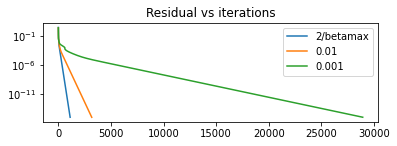

In [38]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
for i in residuallist:
    ax.plot(i)
    
ax.set_yscale('log')
ax.legend(legend)
ax.set_title("Residual vs iterations")

Text(0.5, 1.0, 'Residual vs iterations (gamma = 2/betamax*1.1)')

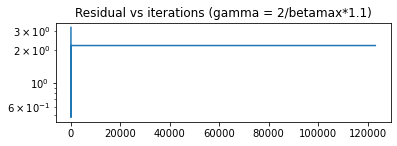

In [42]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(residualvector)
ax.set_yscale('log')
ax.set_title("Residual vs iterations (gamma = 2/betamax*1.1)")

In [134]:
# Checks same endpoints for different starting points (within machine precision).
for i in range(len(x1points)):
     for k in range(len(x1points)):
        if k > i:
            print('Startpoint ' + str(i) + ' is equal to startpoint ' + str(k) + ' :' + str(np.all(x0points[i] == x0points[k])))
            print('Endpoint ' + str(i) + ' is equal to endpoint ' + str(k) + ' :' + str(np.all(x1points[i] - x1points[k] <= pow(10,-10))))
     



Startpoint 0 is equal to startpoint 1 :False
Endpoint 0 is equal to endpoint 1 :True
Startpoint 0 is equal to startpoint 2 :False
Endpoint 0 is equal to endpoint 2 :True
Startpoint 0 is equal to startpoint 3 :False
Endpoint 0 is equal to endpoint 3 :True
Startpoint 0 is equal to startpoint 4 :False
Endpoint 0 is equal to endpoint 4 :True
Startpoint 1 is equal to startpoint 2 :False
Endpoint 1 is equal to endpoint 2 :True
Startpoint 1 is equal to startpoint 3 :False
Endpoint 1 is equal to endpoint 3 :True
Startpoint 1 is equal to startpoint 4 :False
Endpoint 1 is equal to endpoint 4 :True
Startpoint 2 is equal to startpoint 3 :False
Endpoint 2 is equal to endpoint 3 :True
Startpoint 2 is equal to startpoint 4 :False
Endpoint 2 is equal to endpoint 4 :True
Startpoint 3 is equal to startpoint 4 :False
Endpoint 3 is equal to endpoint 4 :True


# $\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

Also: 

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__ 

_Fill in your solution here!_

__a)__ Similar to the primal, the upper bound $\gamma < \frac{2}{\beta}$ is used. The smallest possible $\beta$ is the dominant eigenvalue of $Q^{-1}$. Choosing $\gamma$ as close as possible to the upper bound seems reasonable. See figure "residuals vs iterations" below.

__b)__ Yes, $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ are the same with a precision of $1.71*10^{-13}$.

__c)__ Yes

__d__ After about 2400 iterations the extracted primal iterates start to satisfy the constraint

__e__ The function values for  𝑓(𝑥̂ 𝑘)  go back and forth quickly for about 25 iterations and then stays basically flat, with very small changes, until the stopping condition is reached

__f__ The function values for  𝑓(𝑥̂ 𝑘)+𝜄𝑆(𝑥̂ 𝑘)  are infinity, because of the indicator-function, until about 2400 iterations, just as in d). It then goes to -2.67 and just slitghtly improves until the stopping condition is reached.


In [104]:
n = 20
betamax = max(np.linalg.eig(np.linalg.inv(Q))[0])
gamma = 2/betamax
stop = pow(10,-15)
residual = 10000000
mu0 = np.ones(n)

residualvector = []
xhatvector = []
f = []
fg = []

while residual > stop:
    grad = grad_quadconj(mu0,Q,q)
    mu1 = prox_boxconj(mu0-gamma*grad, a, b, gamma)

    residual = np.linalg.norm(mu1-mu0)
    residualvector.append(residual)
    xhat = dual_to_primal(mu1,Q,q,a,b)
    xhatvector.append(xhat)
    f.append(quad(xhat,Q,q))
    fg.append(quad(xhat,Q,q)+box(xhat,a-0.0000000001,b+0.0000000001))
    
    mu0 = mu1

print(residual)

9.992007221626409e-16


In [99]:
residuallist = []

In [105]:
residuallist.append(residualvector)

In [106]:
legend = ["2/betamax" , "2/betamax*0.3" , "2/betamax*0.1"]

Text(0.5, 1.0, 'Residual vs iterations')

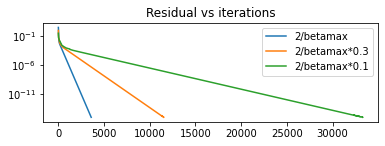

In [107]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
for i in residuallist:
    ax.plot(i)
    
ax.set_yscale('log')
ax.legend(legend)
ax.set_title("Residual vs iterations")

In [108]:
np.linalg.norm(xhat - x0)

1.7315601299022688e-13

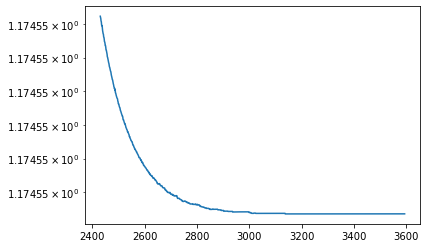

In [318]:
distance = []
for xhat in xhatvector:
    xhat = np.around(xhat,12)
    distance.append(np.linalg.norm(xhat-box(xhat,a-0.0000000001,b+0.0000000001))) # This is due to numerical errors. The extracted primal solution from the dual 
                                                                                  # differs from the primal solution after about 12 deicmals.
       
plt.plot(distance)
plt.yscale('log') 

d) After about 2400 iterations the extracted primal iterates start to satisfy the constraint

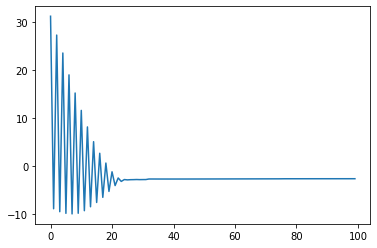

In [323]:
plt.plot(f[:100])

e) The function values for $f\left(\hat{x}^k\right)$ go back and forth quickly for about 25 iterations and then stays basically flat, with very small changes, until the stopping condition is reached.

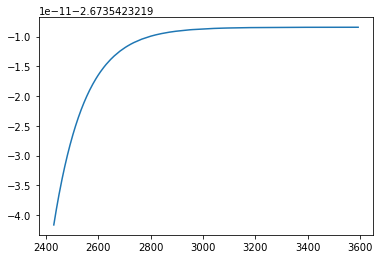

In [345]:
plt.plot(fg)

e) The function values for $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$ are infinity, because of the indicator-function, until about 2400 iterations, just as in d). It then goes to -2.67 and just slitghtly improves until the stopping condition is reached.